In [1]:
# plotting libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from pathlib import Path

# auxiliary functions
import s3ts.analysis as aux

In [3]:
storage_fold = Path("../storage/")
df1 = aux.load_data(storage_fold / "exp_data" / "wlen")
df2 = aux.load_data(storage_fold / "exp_data" / "wtst")
df = pd.concat([df1, df2], ignore_index=True)

cols = ['target_test_acc', 'target_test_auroc', 'target_val_acc', 'target_val_auroc', 'tgt_nepochs', 'pre_nepochs']
 
df["eq_wsize"] = df["window_length"]*df["window_time_stride"]
df.loc[df["pretrain"] == False, "stride_series"] = True
df

,dataset,arch,repr,pretrain,fold_number,random_state,batch_size,stride_series,window_length,window_time_stride,...,target_val_f1,target_test_f1,target_val_auroc,target_test_auroc,pre_val_mse,pre_val_r2,pre_best_model,pre_train_csv,pre_nepochs,eq_wsize
0,CBF,ResNet,DF,False,0,0,128,True,5,1,...,0.476447,0.446791,0.647520,0.582723,NaN,NaN,NaN,NaN,NaN,5
1,CBF,ResNet,DF,True,0,0,128,True,5,1,...,0.524214,0.484109,0.699482,0.642688,0.996103,-0.087854,training/2023-04-11_10-10_EXP_wlen_DF_ResNet_C...,training/2023-04-11_10-10_EXP_wlen_DF_ResNet_C...,54.0,5
2,CBF,ResNet,DF,False,0,0,128,True,10,1,...,0.509615,0.443988,0.669221,0.602845,NaN,NaN,NaN,NaN,NaN,10
3,CBF,ResNet,DF,True,0,0,128,True,10,1,...,0.528795,0.470951,0.718409,0.648140,0.932500,0.046720,training/2023-04-11_10-10_EXP_wlen_DF_ResNet_C...,training/2023-04-11_10-10_EXP_wlen_DF_ResNet_C...,58.0,10
4,CBF,ResNet,DF,False,0,0,128,True,15,1,...,0.516536,0.453598,0.678877,0.603269,NaN,NaN,NaN,NaN,NaN,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,CBF,CNN,DF,False,0,0,128,True,10,5,...,0.583299,0.559052,0.802247,0.751504,NaN,NaN,NaN,NaN,NaN,50
396,CBF,CNN,DF,True,0,0,128,True,10,5,...,0.639715,0.615609,0.815809,0.785579,0.996820,-0.088749,training/2023-04-14_10-52_EXP_wtst_DF_CNN_CBF_...,training/2023-04-14_10-52_EXP_wtst_DF_CNN_CBF_...,58.0,50
397,CBF,CNN,DF,True,0,0,128,False,10,5,...,0.602902,0.598847,0.817616,0.792311,0.829738,0.245826,training/2023-04-14_10-52_EXP_wtst_DF_CNN_CBF_...,training/2023-04-14_10-52_EXP_wtst_DF_CNN_CBF_...,57.0,50
398,CBF,CNN,DF,False,0,0,128,True,15,2,...,0.516134,0.480446,0.713248,0.678647,NaN,NaN,NaN,NaN,NaN,30


In [4]:
df.groupby(["dataset", "repr", "arch", 	"eq_wsize", "pretrain", "stride_series"])[cols].mean()

target_test_acc  \
dataset repr arch   eq_wsize pretrain stride_series                    
CBF     DF   CNN    5        False    True                  0.459065   
                             True     True                  0.481874   
                    10       False    True                  0.470955   
                             True     False                 0.563546   
                                      True                  0.516493   
...                                                              ...   
        TS   ResNet 40       False    True                  0.522848   
                    45       False    True                  0.542052   
                    50       False    True                  0.555451   
                    60       False    True                  0.563204   
                    75       False    True                  0.581944   

                                                     target_test_auroc  \
dataset repr arch   eq_wsize pretrain stride_series                      
CBF     DF   CNN    5        False    True                    0.634480   
                             True     True                    0.674104   
                    10       False    True                    0.639384   
                             True     False                   0.739618   
                                      True                    0.697114   
...                                                                ...   
        TS   ResNet 40       False    True                    0.701743   
                    45       False    True                    0.721374   
                    50       False    True                    0.721769   
                    60       False    True                    0.735498   
                    75       False    True                    0.740552   

                                                     target_val_acc  \
dataset repr arch   eq_wsize pretrain stride_series                   
CBF     DF   CNN    5        False    True                 0.462560   
                             True     True                 0.476346   
                    10       False    True                 0.475865   
                             True     False                0.569058   
                                      True                 0.521149   
...                                                             ...   
        TS   ResNet 40       False    True                 0.533069   
                    45       False    True                 0.556471   
                    50       False    True                 0.576650   
                    60       False    True                 0.579904   
                    75       False    True                 0.575726   

                                                     target_val_auroc  \
dataset repr arch   eq_wsize pretrain stride_series                     
CBF     DF   CNN    5        False    True                   0.641043   
                             True     True                   0.668410   
                    10       False    True                   0.645330   
                             True     False                  0.749827   
                                      True                   0.704530   
...                                                               ...   
        TS   ResNet 40       False    True                   0.708666   
                    45       False    True                   0.728818   
                    50       False    True                   0.738262   
                    60       False    True                   0.743179   
                    75       False    True                   0.736066   

                                                     tgt_nepochs  pre_nepochs  
dataset repr arch   eq_wsize pretrain stride_series                            
CBF     DF   CNN    5        False    True                  70.6          NaN  
                             True     T

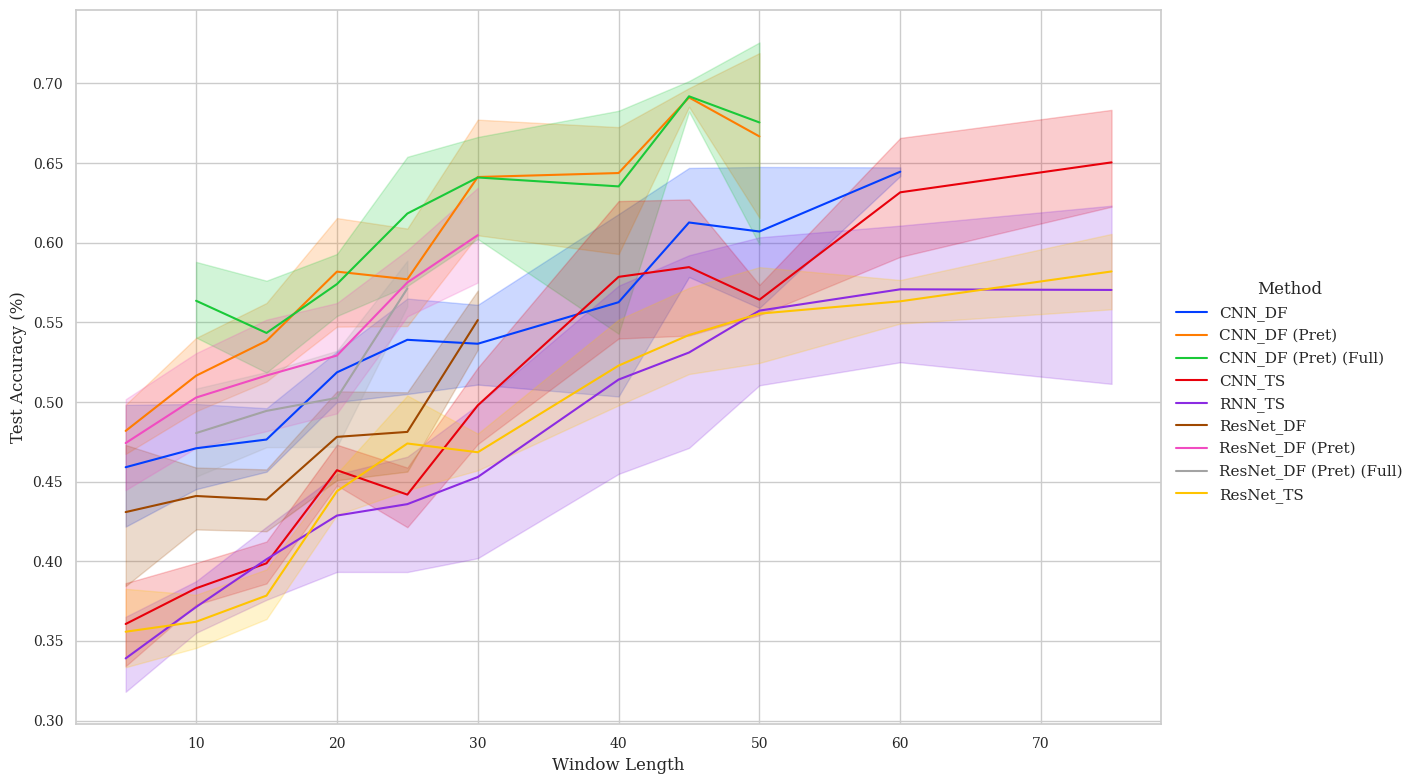

In [5]:
data = df.copy()
data["Method"] =  data["arch"] + "_" + data["repr"] + data["pretrain"].replace({True: " (Pret)", False: ""}) + data["stride_series"].replace({True: "", False: " (Full)"})
data.sort_values(["Method"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')


g = sns.relplot(data=data, x="eq_wsize", y="target_test_acc", hue='Method', kind="line", palette="bright",
                height=8, aspect=1.5, legend=True, markers="True", facet_kws={"despine": False})

g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Window Length");

g.savefig("../figures/wtst.pdf", bbox_inches='tight')

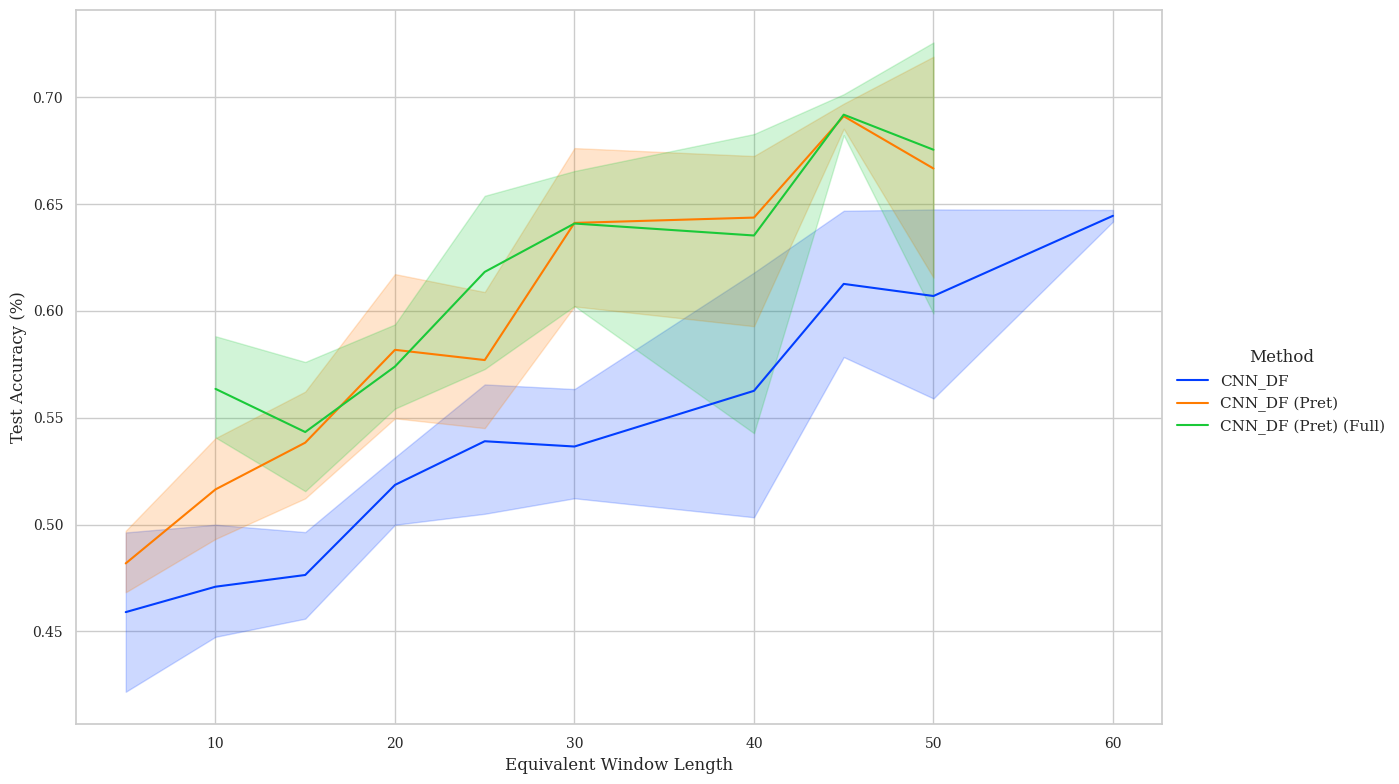

In [6]:
data = df.copy()
data = data[data["repr"] == "DF"]
data = data[data["arch"] == "CNN"]


data["Method"] =  data["arch"] + "_" + data["repr"] + data["pretrain"].replace({True: " (Pret)", False: ""}) + data["stride_series"].replace({True: "", False: " (Full)"})
data.sort_values(["Method"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

g = sns.relplot(data=data, x="eq_wsize", y="target_test_acc", hue='Method', kind="line", palette="bright",
                height=8, aspect=1.5, legend=True, markers="True", facet_kws={"despine": False})

g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Equivalent Window Length");

g.savefig("../figures/wtst.pdf", bbox_inches='tight')

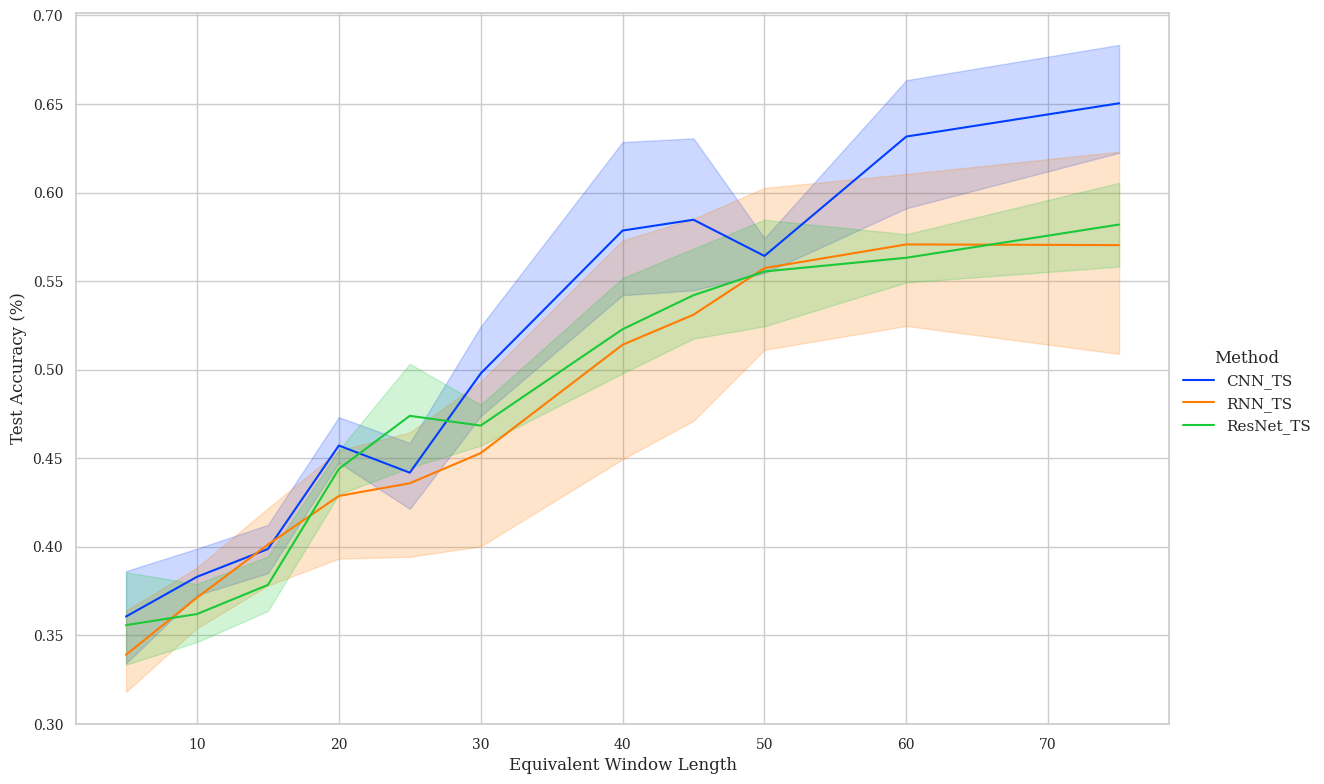

In [7]:
data = df.copy()
data = data[data["repr"] == "TS"]


data["Method"] =  data["arch"] + "_" + data["repr"] + data["pretrain"].replace({True: " (Pret)", False: ""}) + data["stride_series"].replace({True: "", False: " (Full)"})
data.sort_values(["Method"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')


g = sns.relplot(data=data, x="eq_wsize", y="target_test_acc", hue='Method', kind="line", palette="bright",
                height=8, aspect=1.5, legend=True, markers="True", facet_kws={"despine": False})

g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Equivalent Window Length");

g.savefig("../figures/wtst.pdf", bbox_inches='tight')

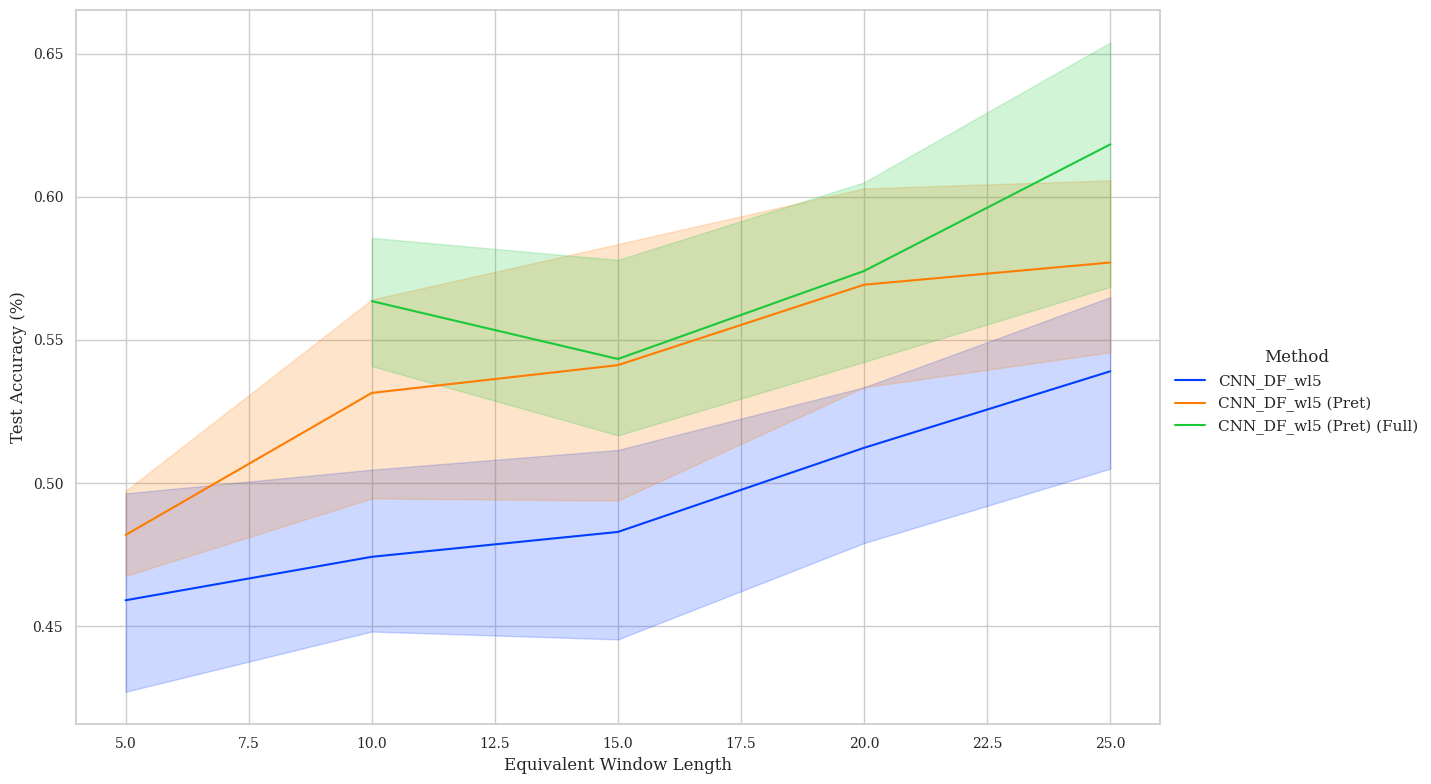

In [10]:
data = df.copy()
data = data[data["repr"] == "DF"]
data = data[data["arch"] == "CNN"]
data = data[data["window_length"] == 5]


data["Method"] =  data["arch"] + "_" + data["repr"] + data["pretrain"].replace({True: " (Pret)", False: ""}) + data["stride_series"].replace({True: "", False: " (Full)"})

data["Method"] =  data["arch"] + "_" + data["repr"] + "_wl" + data["window_length"].astype(str) + data["pretrain"].replace({True: " (Pret)", False: ""}) + data["stride_series"].replace({True: "", False: " (Full)"})


data.sort_values(["Method"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')


g = sns.relplot(data=data, x="eq_wsize", y="target_test_acc", hue='Method', kind="line", palette="bright",
                height=8, aspect=1.5, legend=True, markers="True", facet_kws={"despine": False})

g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Equivalent Window Length");

g.savefig("../figures/wtst.pdf", bbox_inches='tight')